# Linear Regression With Regularization

In this exercise, we will implement regularized linear regression and use it to study models with diﬀerent bias-variance properties.
<style write "hello world!" here "...">


## Part 1: Loading and Visualizing Data


Load and visualizing the data from `ex5data1.mat`:


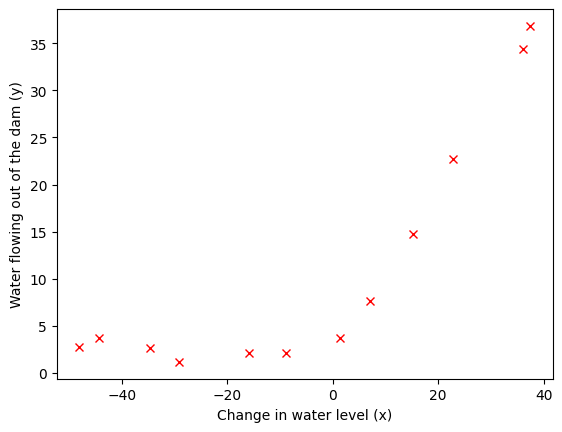

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

mat_data = sio.loadmat('ex5data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
X_test = mat_data['Xtest']
y_test = mat_data['ytest'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()


m = X.shape[0]
m_val = X_val.shape[0]
m_test = X_test.shape[0]

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Part 2: Regularized Linear Regression Cost


The `linear_reg_cost_function()` computes the cost and gradient for regularized linear regression with multiple variables.


In [2]:
def linear_reg_cost_function(theta, X, y, l):
    """
    Compute cost and gradient for regularized linear regression with multiple variables.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    l : float
        Regularization parameter.

    Returns
    -------
    j : numpy.float64
        The cost of using theta as the parameter for linear regression.
    grad : ndarray, shape (n_features,)
        The gradient of using theta as the parameter for linear regression.
    """
    m = X.shape[0]
    j_term1 = 1.0 / (2 * m) * np.sum((X.dot(theta) - y) ** 2)
    j_term2 = 1.0 * l / (2 * m) * np.sum(theta[1:] ** 2)
    j = j_term1 + j_term2

    mask = np.eye(len(theta))
    mask[0, 0] = 0
    grad = 1.0 / m * X.T.dot(X.dot(theta) - y) + 1.0 * l / m * (mask.dot(theta))

    return j, grad


Calculate the cost with the loaded data and theta of [1, 1]：


In [3]:
theta = np.array([1, 1])
j, grad = linear_reg_cost_function(theta, np.hstack((np.ones((m, 1)), X)), y, 1)

print ('Cost at theta = [1 ; 1]:', j)
print ('(this value should be about 303.993192)')

Cost at theta = [1 ; 1]: 303.9931922202643
(this value should be about 303.993192)


In [4]:
j.shape

()

In [5]:
grad.shape

(2,)

## Part 3: Regularized Linear Regression Gradient


Calculate the gradient with the loaded data and theta of [1, 1]：


In [6]:
theta = np.array([1, 1])
_, grad = linear_reg_cost_function(theta, np.hstack((np.ones((m, 1)), X)), y, 1)

print ('Gradient at theta = [1 ; 1]:', grad.ravel())
print ('(this value should be about [-15.303016; 598.250744])')

Gradient at theta = [1 ; 1]: [-15.30301567 598.25074417]
(this value should be about [-15.303016; 598.250744])


## Part 4: Train Linear Regression


The `train_linear_reg()` trains linear regression with given dataset and regularization parameter.


In [8]:
import scipy.optimize as opt


def train_linear_reg(X, y, l, iteration=200):
    """
    Trains linear regression given a dataset (X, y) and a regularization parameter lambda.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    l : float
        Regularization parameter.
    iteration : int
        Max number of iteration.

    Returns
    -------
    ndarray, shape (n_features,)
        Trained linear regression parameters.
    """
    m, n = X.shape
    
    initial_theta = np.zeros(n)
    
    result = opt.minimize(fun=linear_reg_cost_function, 
                          x0=initial_theta, 
                          args=(X, y, l), 
                          method='TNC', 
                          jac=True,
                          options={'maxiter': iteration})

    return result.x

Train linear regression without regularization:


C:\Users\USER\AppData\Local\Temp\ipykernel_9740\2071633222.py:28: OptimizeWarning: Unknown solver options: maxiter
  result = opt.minimize(fun=linear_reg_cost_function,


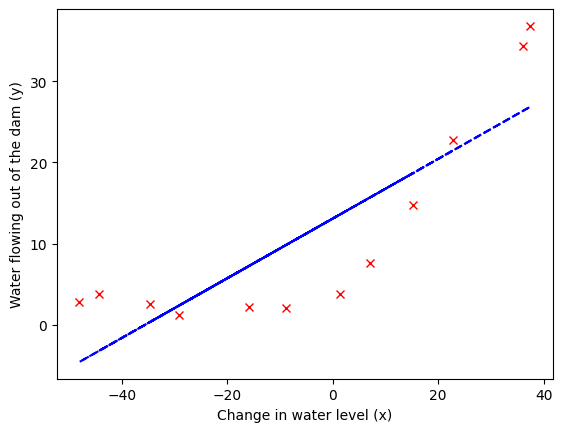

In [9]:
l = 0.0
theta = train_linear_reg(np.hstack((np.ones((m, 1)), X)), y, l)

pred = np.hstack((np.ones((m, 1)), X)).dot(theta)

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r')
plt.plot(X, pred, linestyle='--', marker='', color='b')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Part 5: Learning Curve for Linear Regression


The `learning_curve()` generates the train and cross validation set errors needed to plot a learning curve.


In [11]:
def learning_curve(X, y, X_val, y_val, l):
    """
    Generates the train and cross validation set errors needed to plot a learning curve.

    Parameters
    ----------
    X : ndarray, shape (n_train_samples, n_features)
        Samples of training set, where n_train_samples is the number of samples in training set and n_features is the
        number of features.
    y : ndarray, shape (n_train_samples,)
        Labels of training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Samples of cross validation set, where n_val_samples is the number of samples in cross validation set.
    y_val : ndarray, shape (n_val_samples,)
        Labels of cross validation set.
    l : float
        Regularization parameter.

    Returns
    -------
    error_train : ndarray, shape (n_train_samples,)
        Train set error, error_train[i] contains the training error for the model trained by the first (i + 1) training
        samples.
    error_val : ndarray, shape (n_train_samples,)
        Cross validation set error, error_val[i] contains the cross validation error for the model trained by the first
        (i + 1) training samples.
    """
    m = X.shape[0]
    m_val = X_val.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(1, m + 1):
        theta = train_linear_reg(X[:i], y[:i], l)
        error_train[i - 1], _ = linear_reg_cost_function(theta, X[:i], y[:i], 0)
        error_val[i - 1], _ = linear_reg_cost_function(theta, X_val, y_val, 0)

    return error_train, error_val
    

Plot the learning Curve for linear regression:


C:\Users\USER\AppData\Local\Temp\ipykernel_9740\2071633222.py:28: OptimizeWarning: Unknown solver options: maxiter
  result = opt.minimize(fun=linear_reg_cost_function,


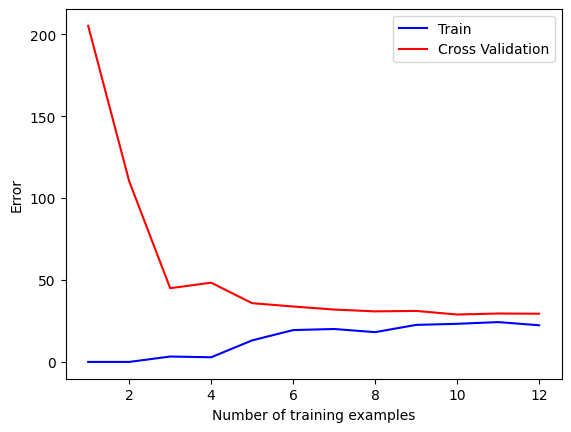

# Training Examples / Train Error / Cross Validation Error
1                   0.00000000    205.12109571
2                   0.00000000    110.30264058
3                   3.28659505    45.01023132
4                   2.84267769    48.36891083
5                   13.15404881   35.86516473
6                   19.44396251   33.82996167
7                   20.09852166   31.97098567
8                   18.17285870   30.86244620
9                   22.60940542   31.13599810
10                  23.26146159   28.93620747
11                  24.31724959   29.55143162
12                  22.37390650   29.43381813


In [12]:
l = 0.0
error_train, error_val = learning_curve(np.hstack((np.ones((m, 1)), X)), 
                                        y, 
                                        np.hstack((np.ones((m_val, 1)), X_val)), 
                                        y_val, 
                                        l)

plt.figure()
plt.plot(range(1, m + 1), error_train, color='b', label='Train')
plt.plot(range(1, m + 1), error_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

print('# Training Examples / Train Error / Cross Validation Error')
for i in range(m):
    print ('{0:<19} {1:<13.8f} {2:<.8f}'.format(i + 1, error_train[i], error_val[i]))

The train error and cross validation error are both high, indicating a high bias problem. The linear regression model is too simple to fit the data.


## Part 6: Feature Mapping for Polynomial Regression

The `poly_features()` maps a single feature into the p-th power.


In [13]:
def poly_features(X, p):
    """
    Maps X (1D vector) into the p-th power.

    Parameters
    ----------
    X : ndarray, shape (n_samples, 1)
        Features to be mapped to polynomial ones.
    p : int
        Power of polynomial features.

    Returns
    -------
    ndarray, shape (n_samples, p)
        Polynomial features.
    """
    X_poly = np.zeros((X.shape[0], p))

    for i in range(1, p + 1):
        X_poly[:, i - 1] = X[:, 0] ** i

    return X_poly


The `feature_normalize()` normalizes the given features.


In [14]:
def feature_normalize(X, mu=None, sigma=None):
    """
    Normalizes the features in x.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples to be normalized, where n_samples is the number of samples and n_features is the number of features.
    mu : ndarray, shape (n_features,)
        Mean value for normalization. If not provided, it will be calculated from X.
    sigma : ndarray, shape (n_features,)
        Standard deviation for normalization. If not provided, it will be calculated from X.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        The normalized features.
    mu : ndarray, shape (n_features,)
        Mean value of X.
    sigma : ndarray, shape (n_features,)
        Standard deviation of X.
    """

    # TODO: YOUR CODE HERE
    
    if mu is None:
        mu = np.mean(X, axis=0)

    if sigma is None:
        sigma = np.std(X, axis=0)

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Since the linear model is too simple, we add more features using the higher powers of X.


In [17]:
p = 8

X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.hstack((np.ones((m, 1)), X_poly))

X_poly_test = poly_features(X_test, p)
X_poly_test, dummy_mu, dummy_sigma = feature_normalize(X_poly_test, mu, sigma)
X_poly_test = np.hstack((np.ones((m_test, 1)), X_poly_test))

X_poly_val = poly_features(X_val, p)
X_poly_val, dummy_mu, dummy_sigma = feature_normalize(X_poly_val, mu, sigma)
X_poly_val = np.hstack((np.ones((m_val, 1)), X_poly_val))

print('Normalized Training Example 1:')
print(X_poly[0, :])

Normalized Training Example 1:
[ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


## Part 7: Learning Curve for Polynomial Regression


The `plot_fit() ` plots a learned polynomial regression fit.


In [18]:
def plot_fit(min_x, max_x, mu, sigma, theta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.

    Parameters
    ----------
    min_x : float
        Minimum value of features.
    max_x : float
        Maximum value of features.
    mu : ndarray, shape (n_features - 1,)
        Mean value of features, without the intercept term.
    sigma : ndarray, shape (n_features - 1,)
        Standard deviation of features, without the intercept term.
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    p : int
        Power of polynomial fit.
    """
    x = np.arange(min_x - 15, max_x + 25, 0.05)
    X_poly = poly_features(x.reshape(-1, 1), p)
    X_poly, dummy_mu, dummy_sigma = feature_normalize(X_poly, mu, sigma)
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    plt.plot(x, X_poly.dot(theta), linestyle='--', marker='', color='b')


Train and plot the polynomial fit:


C:\Users\USER\AppData\Local\Temp\ipykernel_9740\2071633222.py:28: OptimizeWarning: Unknown solver options: maxiter
  result = opt.minimize(fun=linear_reg_cost_function,


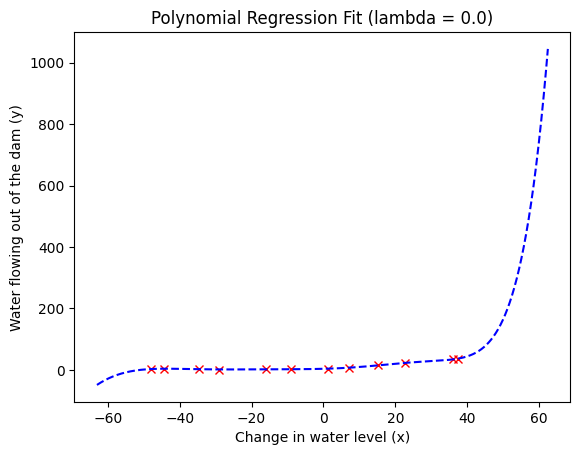

In [19]:
l = 0.0
theta = train_linear_reg(X_poly, y, l, iteration=500)

plt.figure()
plt.plot(X, y, linestyle='', marker='x', color='r')
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = {})'.format(l))
plt.show()

The polynomial model fits the dataset well. But the model is too complex and produces very large value when x reaches 60, suggesting a high variance issue.


Plot the learning curve for polynomial regression:


C:\Users\USER\AppData\Local\Temp\ipykernel_9740\2071633222.py:28: OptimizeWarning: Unknown solver options: maxiter
  result = opt.minimize(fun=linear_reg_cost_function,


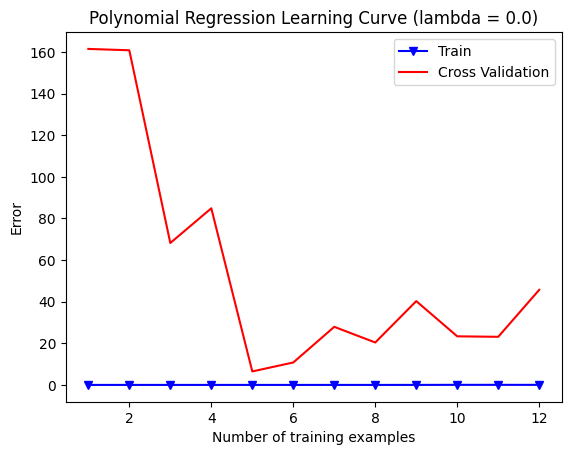

In [20]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, y_val, l)
plt.figure()
plt.plot(range(1, m + 1), error_train, color='b', marker='v', label='Train')
plt.plot(range(1, m + 1), error_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(l))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

The training error is low, but the cross validation error is high, indicating a high variance problem.


## Part 8: Validation for Selecting Lambda


The `validation_curve()` generate the train and validation errors needed to plot a validation curve, which can be used to select the regularization parameter lambda.


In [22]:
def validation_curve(x, y, x_val, y_val, lambda_vec):
    """
    Generate the train and validation errors needed to plot a validation curve that we can use to select lambda.

    Parameters
    ----------
    X : ndarray, shape (n_train_samples, n_features)
        Samples of training set, where n_train_samples is the number of samples in training set and n_features is the
        number of features.
    y : ndarray, shape (n_train_samples,)
        Labels of training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Samples of cross validation set, where n_val_samples is the number of samples in cross validation set.
    y_val : ndarray, shape (n_val_samples,)
        Labels of cross validation set.

    Returns
    -------
    lambda_vec : ndarray, shape (n_lambdas,)
        The regularization parameters used for models, where n_lambdas is the number of lambda values used for the
        validation curve.
    error_train : ndarray, shape (n_lambdas,)
        Train set error.
    error_val : ndarray, shape (n_lambdas,)
        Cross validation set error.
    """
    
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for i in range(len(lambda_vec)):
        l = lambda_vec[i]
        theta = train_linear_reg(x, y, l)
        error_train[i], _ = linear_reg_cost_function(theta, x, y, 0)
        error_val[i], _ = linear_reg_cost_function(theta, x_val, y_val, 0)

    return lambda_vec, error_train, error_val
    

C:\Users\USER\AppData\Local\Temp\ipykernel_9740\2071633222.py:28: OptimizeWarning: Unknown solver options: maxiter
  result = opt.minimize(fun=linear_reg_cost_function,


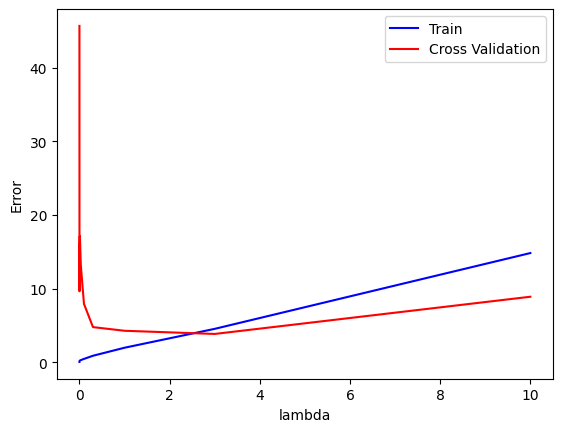

# lambda / Train Error / Validation Error
0.0      0.02997520    45.69632260
0.001    0.10864427    9.62730124
0.003    0.16672815    15.93848552
0.01     0.21796274    17.14614122
0.03     0.27515435    13.21483300
0.1      0.43865323    7.92681353
0.3      0.86814354    4.76087029
1.0      1.95869069    4.26334801
3.0      4.52512039    3.83217785
10.0     14.82580785   8.88972362


In [23]:
# feel free to try different values for lambda
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, y_val, lambda_vec)

plt.figure()
plt.plot(lambda_vec, error_train, color='b', label='Train')
plt.plot(lambda_vec, error_val, color='r', label='Cross Validation')
plt.legend(loc='upper right')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()

print('# lambda / Train Error / Validation Error')
for i in range(len(lambda_vec)):
    print ('{0:<8} {1:<13.8f} {2:<.8f}'.format(lambda_vec[i], error_train[i], error_val[i]))

The best value of regularization parameter lambda is around 3.
